In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Siamese/Identification'

/content/drive/My Drive/Siamese/Identification


In [ ]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')

In [ ]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 2.6MB/s 


In [ ]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [ ]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 10

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [ ]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 20

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  258


In [ ]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [ ]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(5)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=3)

Encoder loaded


*** Epoch  0  ***
*** Train ***


1876it [04:03,  7.70it/s]

accuracy mean  0.5079957356076759 topk 0.5213219616204691  min  0.4914712153518124
Error  0.47867803837953093
{270: 39, 272: 100, 273: 41, 274: 100, 275: 54, 276: 50, 277: 92, 278: 24, 271: 45, 279: 90, 280: 75, 281: 100, 282: 20, 283: 40, 285: 62, 284: 10, 286: 30, 287: 84, 288: 63, 289: 16}
*** Test ***



258it [00:34,  7.49it/s]


accuracy final_mean  0.7984496124031008  final_min  0.7790697674418605


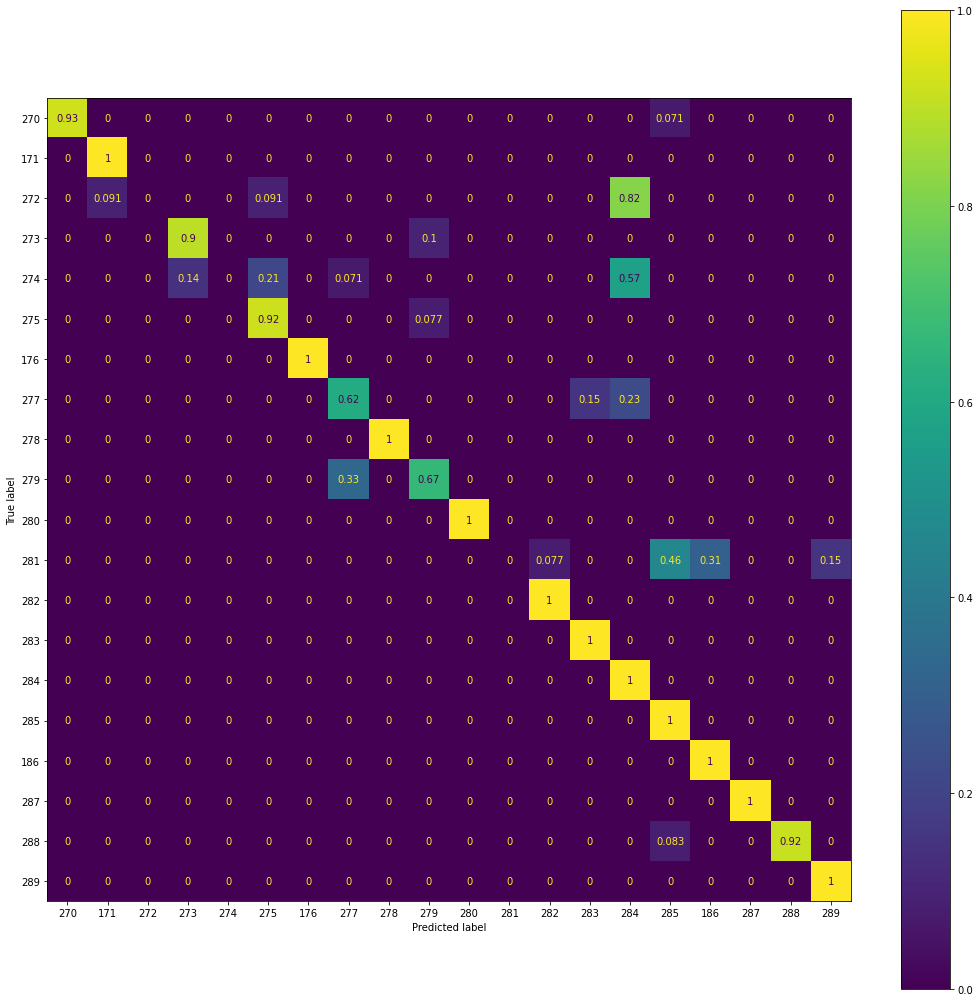

*** Epoch  1  ***
*** Train ***


1876it [00:30, 62.48it/s]

accuracy mean  0.5202558635394456 topk 0.5325159914712153  min  0.5277185501066098
Error  0.46748400852878463
{270: 52, 272: 100, 273: 52, 274: 75, 275: 14, 276: 68, 277: 51, 278: 26, 271: 22, 279: 25, 280: 71, 281: 50, 282: 24, 283: 69, 285: 79, 284: 21, 286: 11, 287: 52, 288: 36, 289: 19}
*** Test ***



258it [00:03, 80.63it/s]


accuracy final_mean  0.875968992248062  final_min  0.8604651162790697


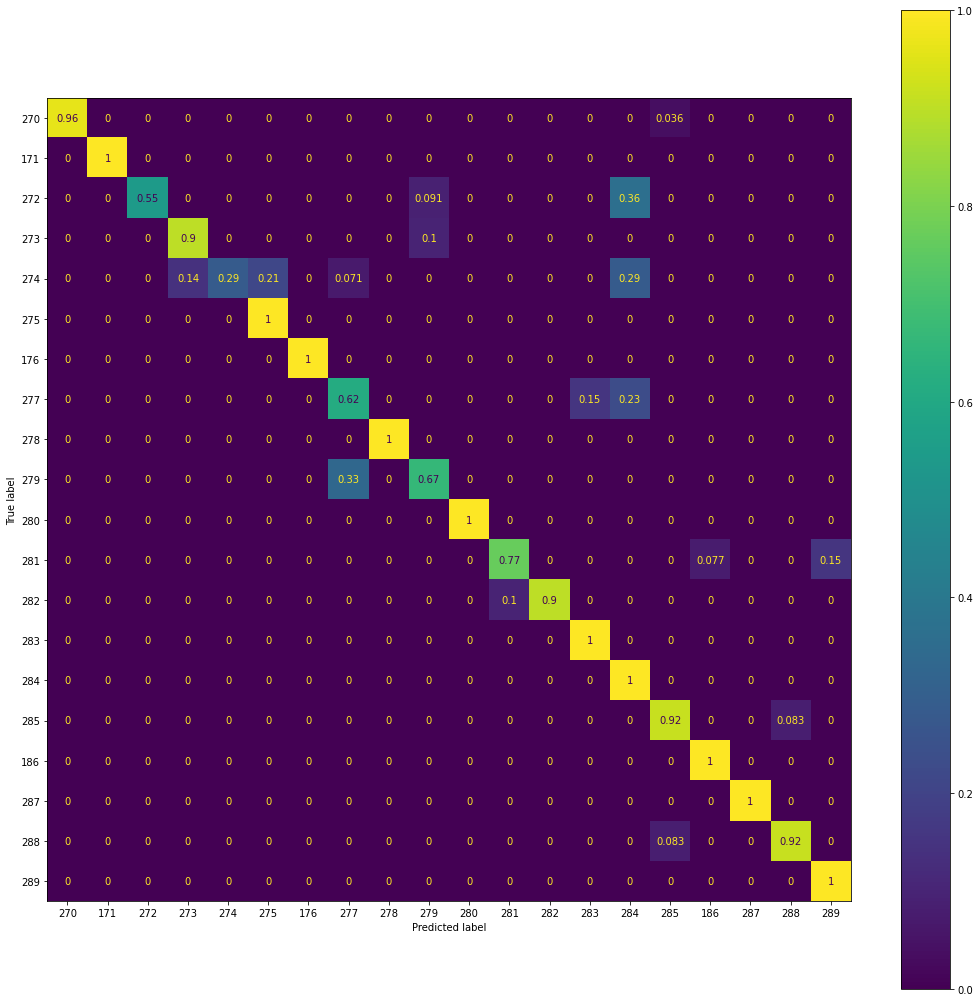

*** Epoch  2  ***
*** Train ***


1876it [00:29, 62.59it/s]

accuracy mean  0.5367803837953091 topk 0.5415778251599147  min  0.5389125799573561
Error  0.4584221748400853
{270: 60, 272: 71, 273: 53, 274: 25, 275: 18, 276: 70, 277: 53, 278: 30, 271: 24, 279: 17, 280: 82, 281: 35, 282: 24, 283: 69, 285: 79, 284: 20, 286: 10, 287: 50, 288: 36, 289: 17}
*** Test ***



258it [00:03, 79.28it/s]


accuracy final_mean  0.8914728682170543  final_min  0.8682170542635659


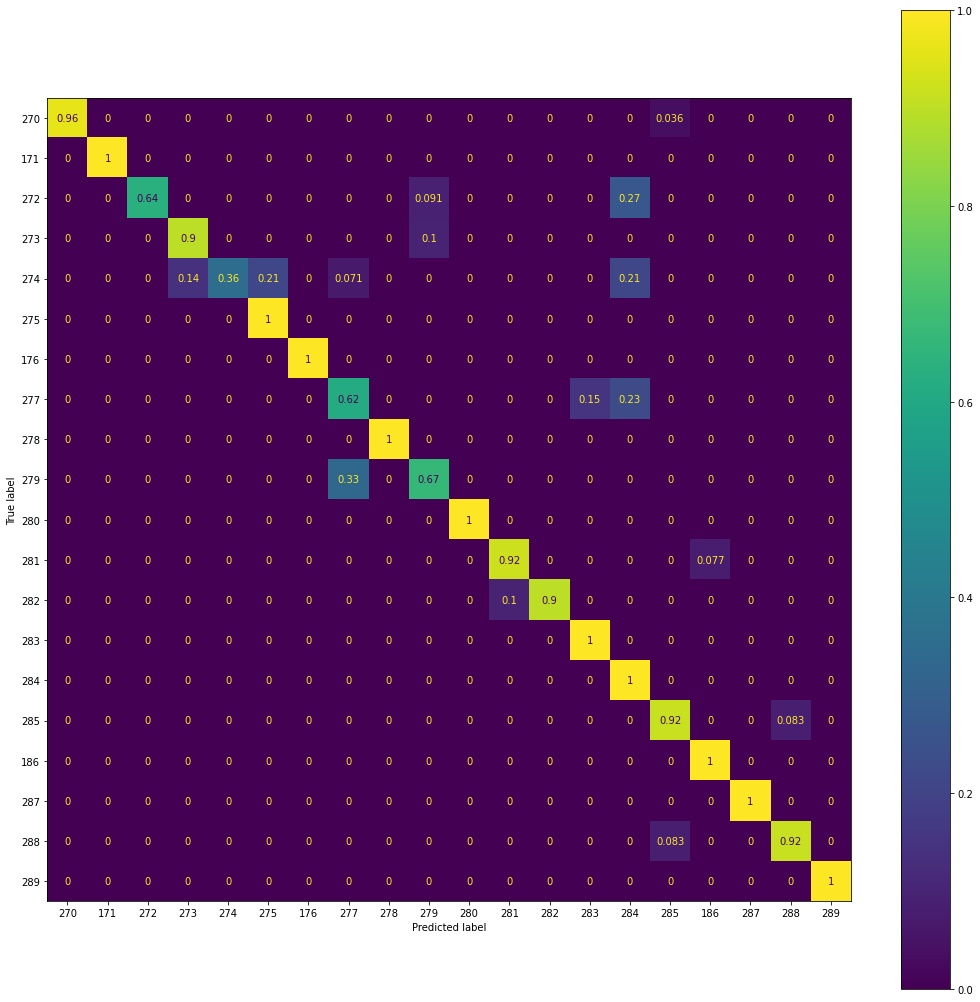

*** Epoch  3  ***
*** Train ***


1876it [00:29, 62.96it/s]

accuracy mean  0.5367803837953091 topk 0.5495735607675906  min  0.5261194029850746
Error  0.4504264392324094
{270: 54, 272: 71, 273: 48, 274: 25, 275: 21, 276: 72, 277: 44, 278: 29, 271: 22, 279: 19, 280: 78, 281: 39, 282: 28, 283: 64, 285: 80, 284: 22, 286: 12, 287: 57, 288: 41, 289: 20}
*** Test ***



258it [00:03, 79.79it/s]


accuracy final_mean  0.8875968992248062  final_min  0.8682170542635659


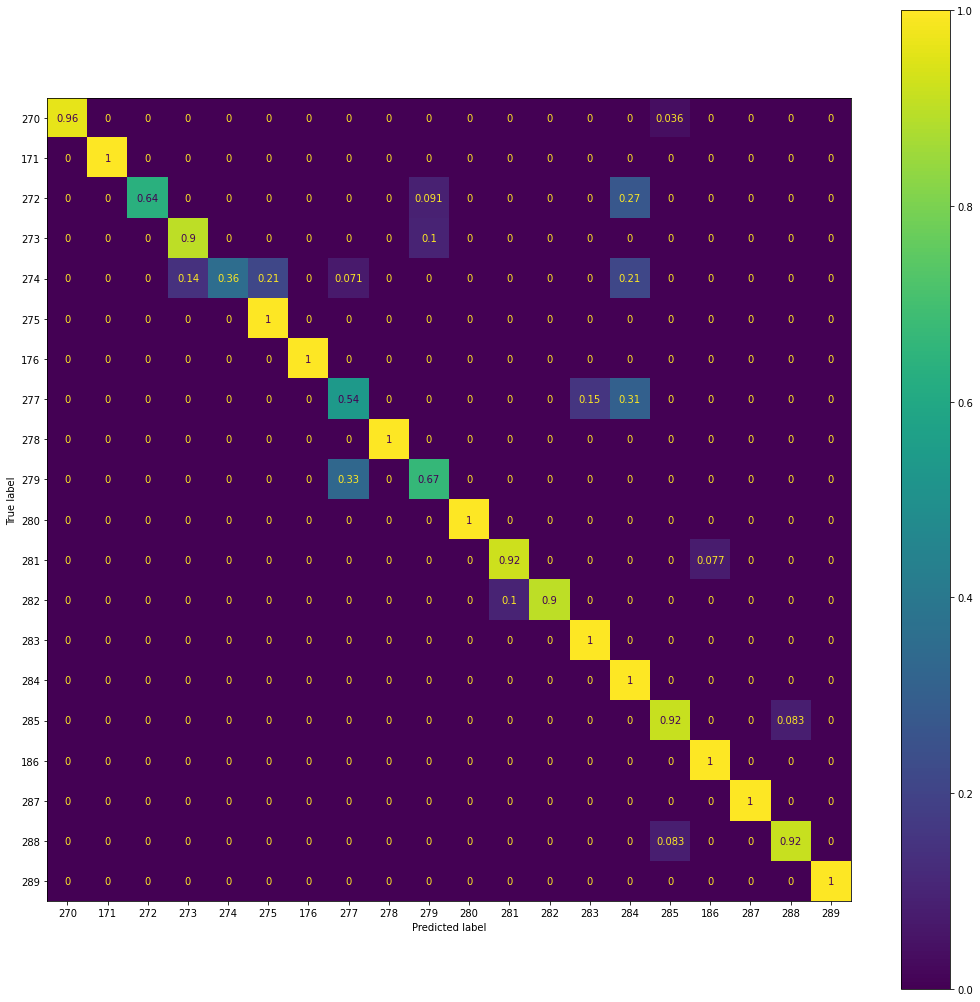

*** Epoch  4  ***
*** Train ***


1876it [00:29, 63.57it/s]

accuracy mean  0.5517057569296375 topk 0.5581023454157783  min  0.5266524520255863
Error  0.44189765458422176
{270: 56, 272: 76, 273: 50, 274: 20, 275: 14, 276: 68, 277: 25, 278: 33, 271: 21, 279: 9, 280: 80, 281: 36, 282: 25, 283: 66, 285: 79, 284: 27, 286: 13, 287: 50, 288: 44, 289: 12}
*** Test ***



258it [00:03, 80.27it/s]


accuracy final_mean  0.8798449612403101  final_min  0.8488372093023255


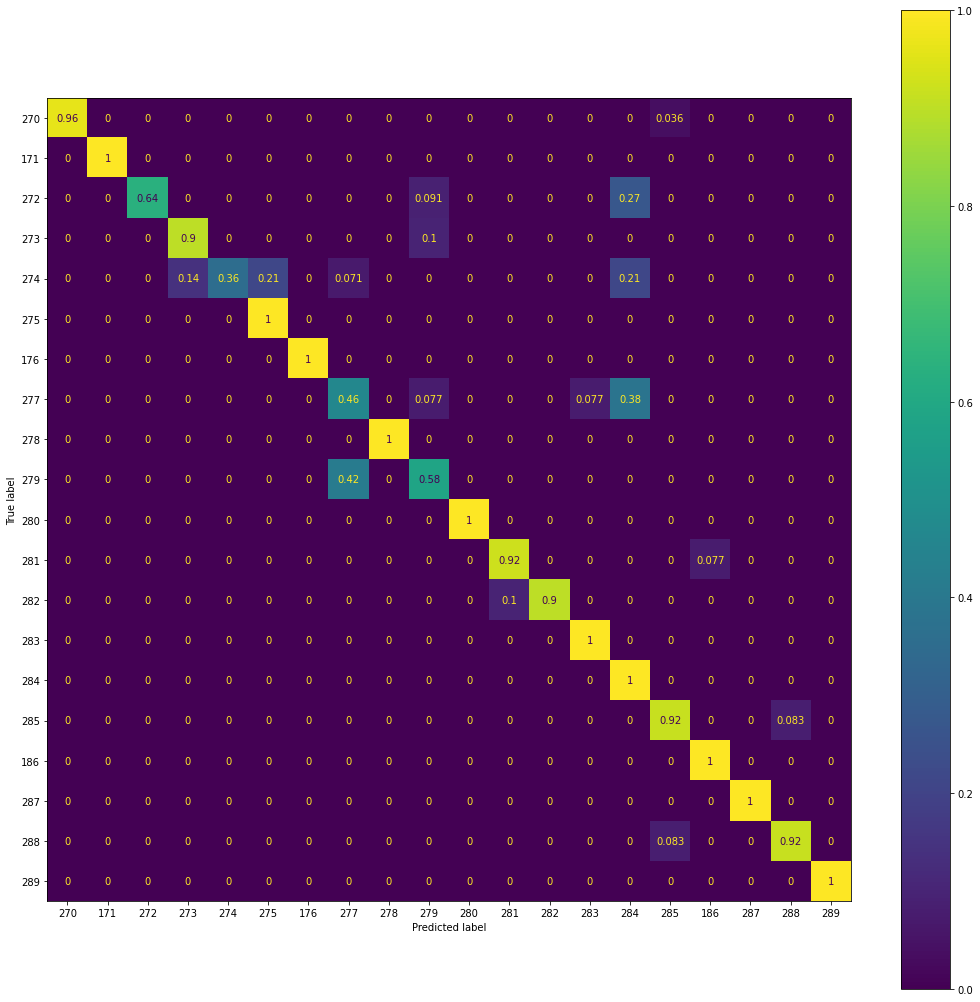

*** Epoch  5  ***
*** Train ***


1876it [00:29, 63.20it/s]

accuracy mean  0.5607675906183369 topk 0.5655650319829424  min  0.5501066098081023
Error  0.43443496801705755
{270: 53, 272: 76, 273: 50, 274: 22, 275: 8, 276: 60, 277: 27, 278: 28, 271: 29, 279: 13, 280: 78, 281: 39, 282: 27, 283: 65, 285: 85, 284: 37, 286: 9, 287: 50, 288: 38, 289: 17}
*** Test ***



258it [00:03, 76.18it/s]


accuracy final_mean  0.872093023255814  final_min  0.8488372093023255


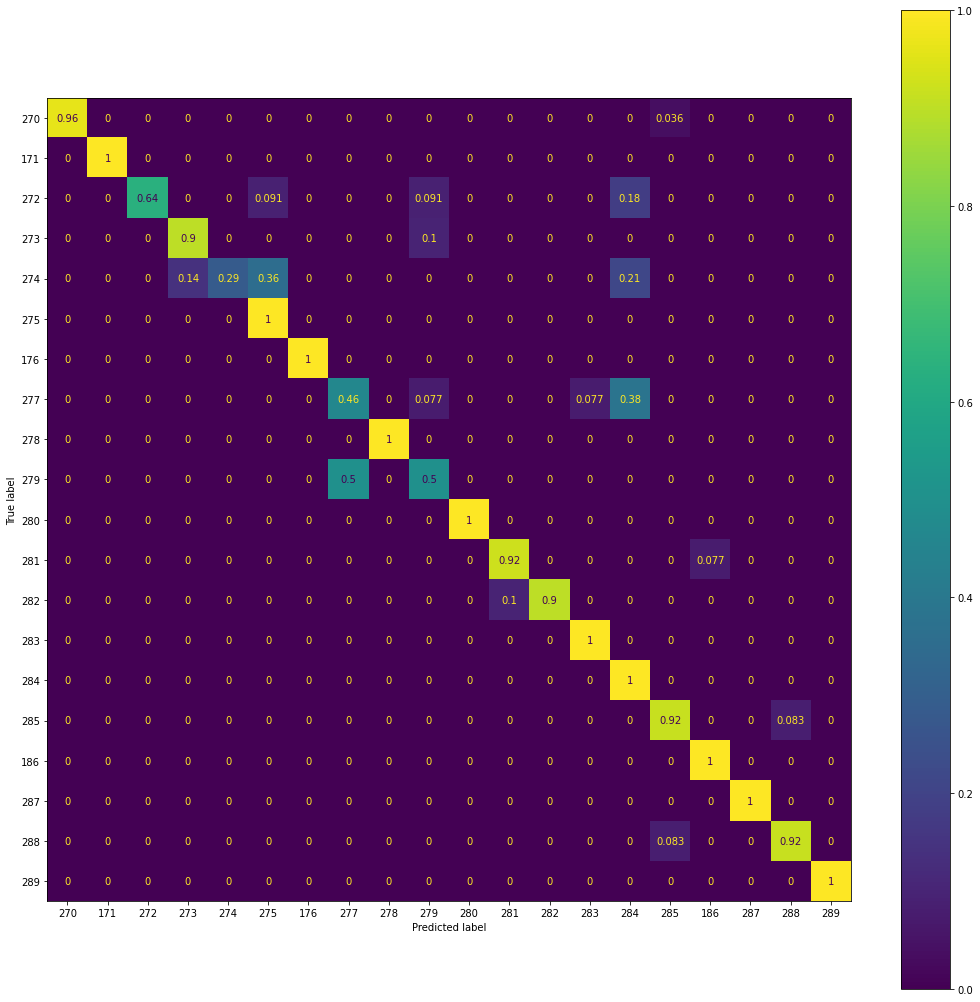

*** Epoch  6  ***
*** Train ***


1876it [00:29, 62.66it/s]

accuracy mean  0.5501066098081023 topk 0.5501066098081023  min  0.5287846481876333
Error  0.44989339019189767
{270: 56, 272: 71, 273: 50, 274: 25, 275: 13, 276: 65, 277: 31, 278: 34, 271: 27, 279: 7, 280: 78, 281: 39, 282: 24, 283: 69, 285: 79, 284: 36, 286: 9, 287: 50, 288: 38, 289: 23}
*** Test ***



258it [00:03, 80.80it/s]


accuracy final_mean  0.872093023255814  final_min  0.8488372093023255


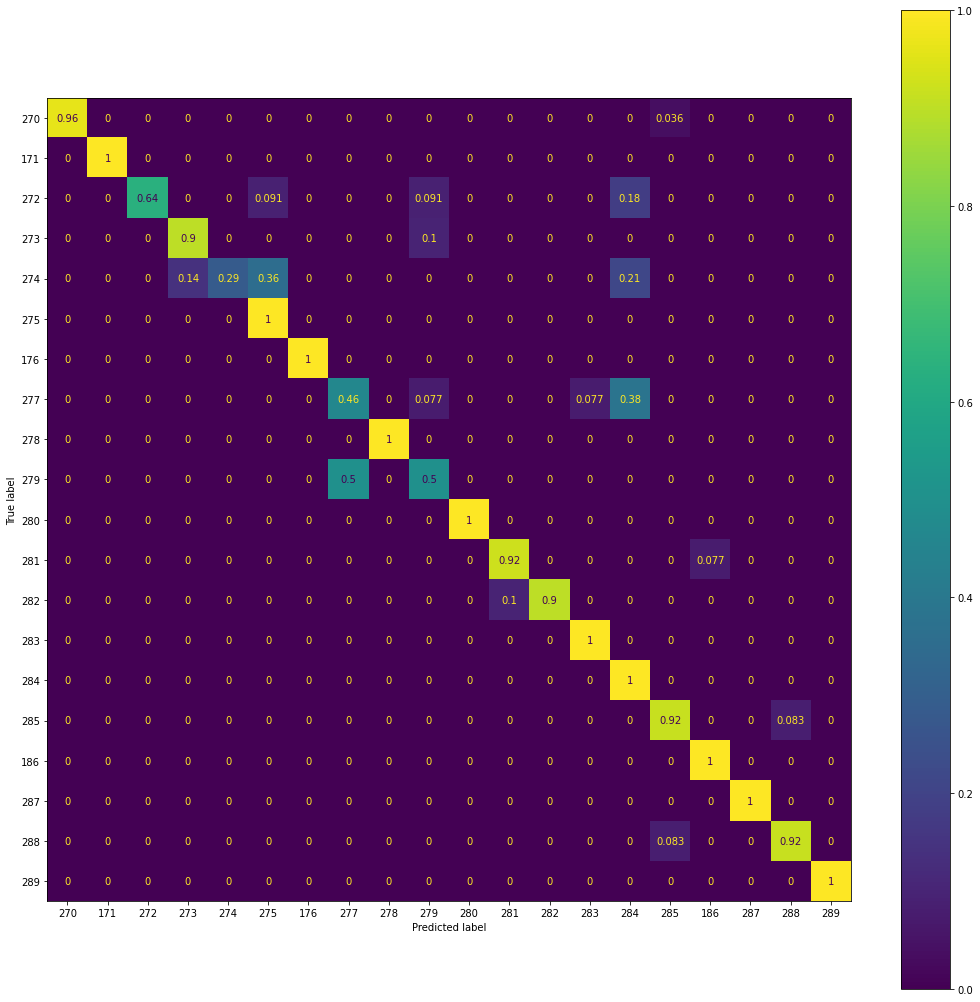

*** Epoch  7  ***
*** Train ***


1876it [00:29, 63.38it/s]

accuracy mean  0.5655650319829424 topk 0.5650319829424307  min  0.5421108742004265
Error  0.4349680170575693
{270: 58, 272: 74, 273: 46, 274: 27, 275: 11, 276: 62, 277: 33, 278: 27, 271: 29, 279: 9, 280: 86, 281: 36, 282: 22, 283: 65, 285: 76, 284: 35, 286: 10, 287: 52, 288: 50, 289: 16}
*** Test ***



258it [00:03, 80.83it/s]


accuracy final_mean  0.8527131782945736  final_min  0.8372093023255814


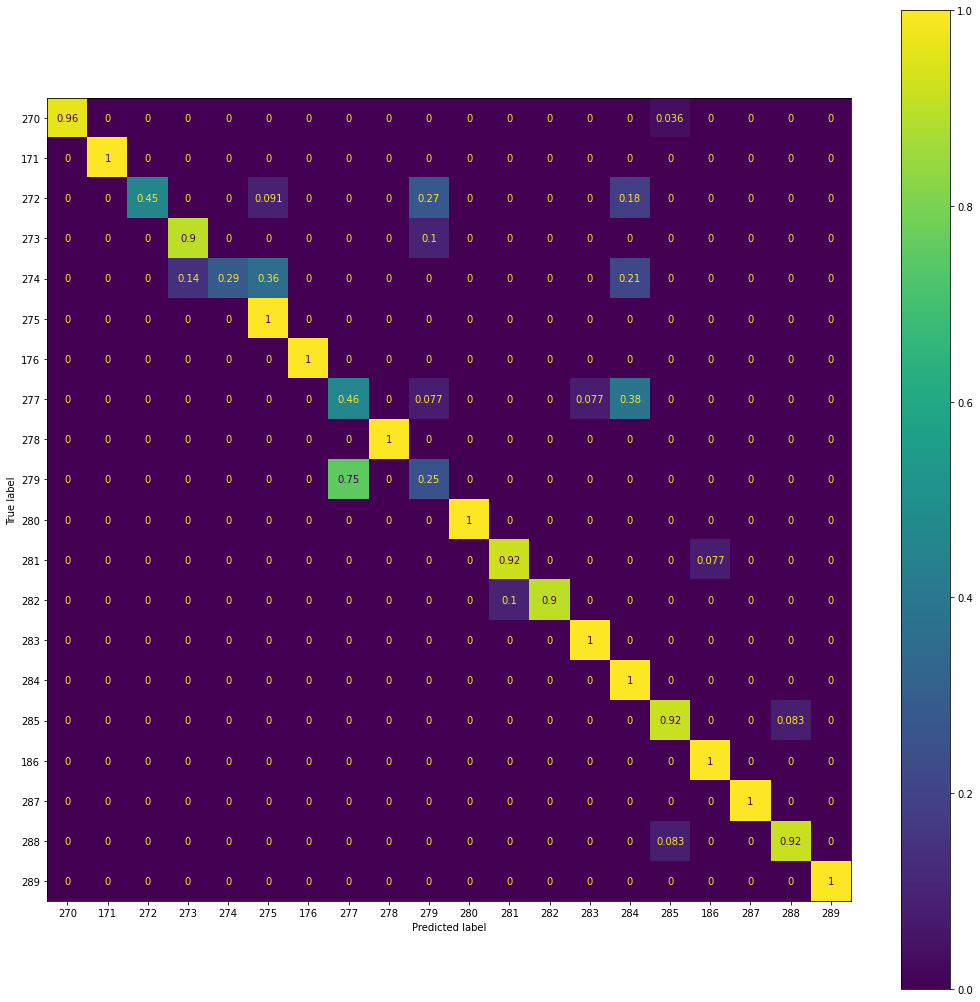

*** Epoch  8  ***
*** Train ***


1876it [00:29, 64.10it/s]

accuracy mean  0.5724946695095949 topk 0.5708955223880597  min  0.5362473347547975
Error  0.4291044776119403
{270: 60, 272: 76, 273: 47, 274: 22, 275: 11, 276: 62, 277: 24, 278: 24, 271: 24, 279: 7, 280: 84, 281: 38, 282: 13, 283: 69, 285: 79, 284: 35, 286: 10, 287: 47, 288: 38, 289: 16}
*** Test ***



258it [00:03, 80.60it/s]


accuracy final_mean  0.8527131782945736  final_min  0.8294573643410853


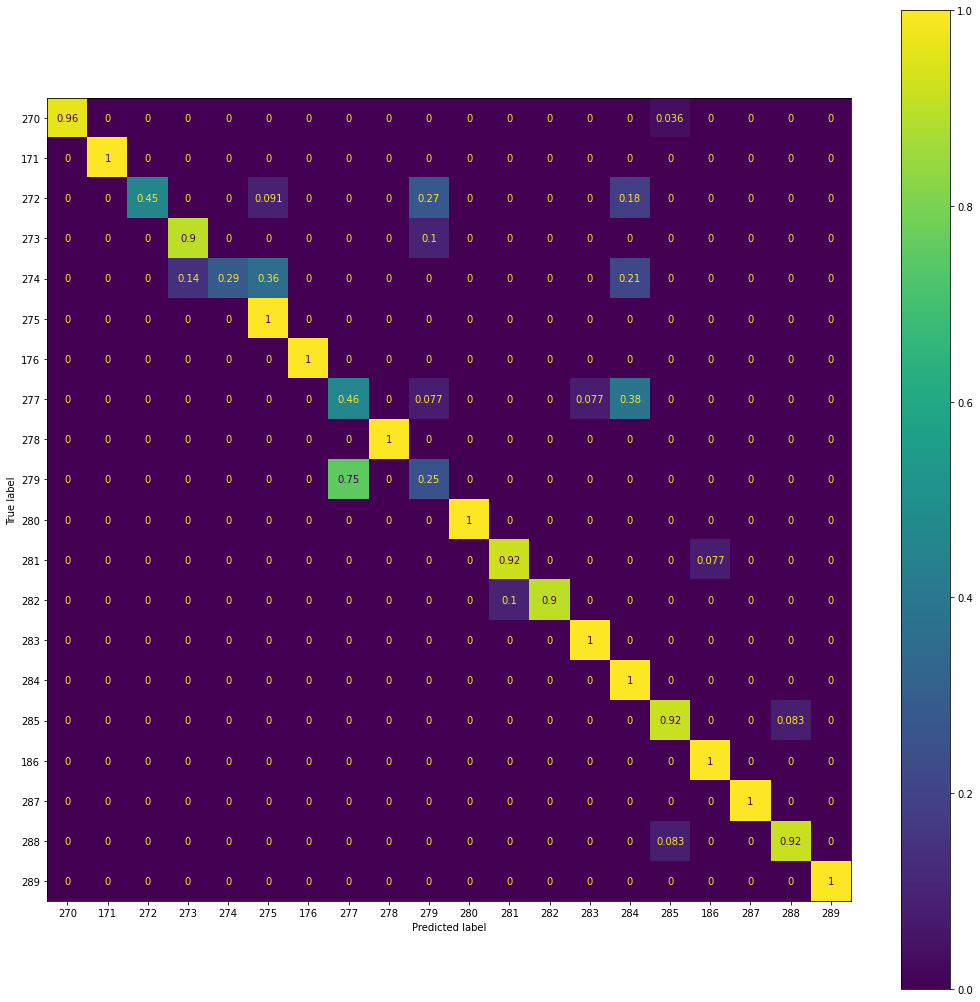

*** Epoch  9  ***
*** Train ***


1876it [00:29, 64.21it/s]

accuracy mean  0.5698294243070362 topk 0.570362473347548  min  0.5298507462686567
Error  0.42963752665245203
{270: 50, 272: 74, 273: 46, 274: 17, 275: 11, 276: 67, 277: 31, 278: 23, 271: 27, 279: 11, 280: 73, 281: 49, 282: 14, 283: 68, 285: 82, 284: 32, 286: 11, 287: 57, 288: 36, 289: 16}
*** Test ***



258it [00:03, 79.72it/s]


accuracy final_mean  0.8488372093023255  final_min  0.8178294573643411


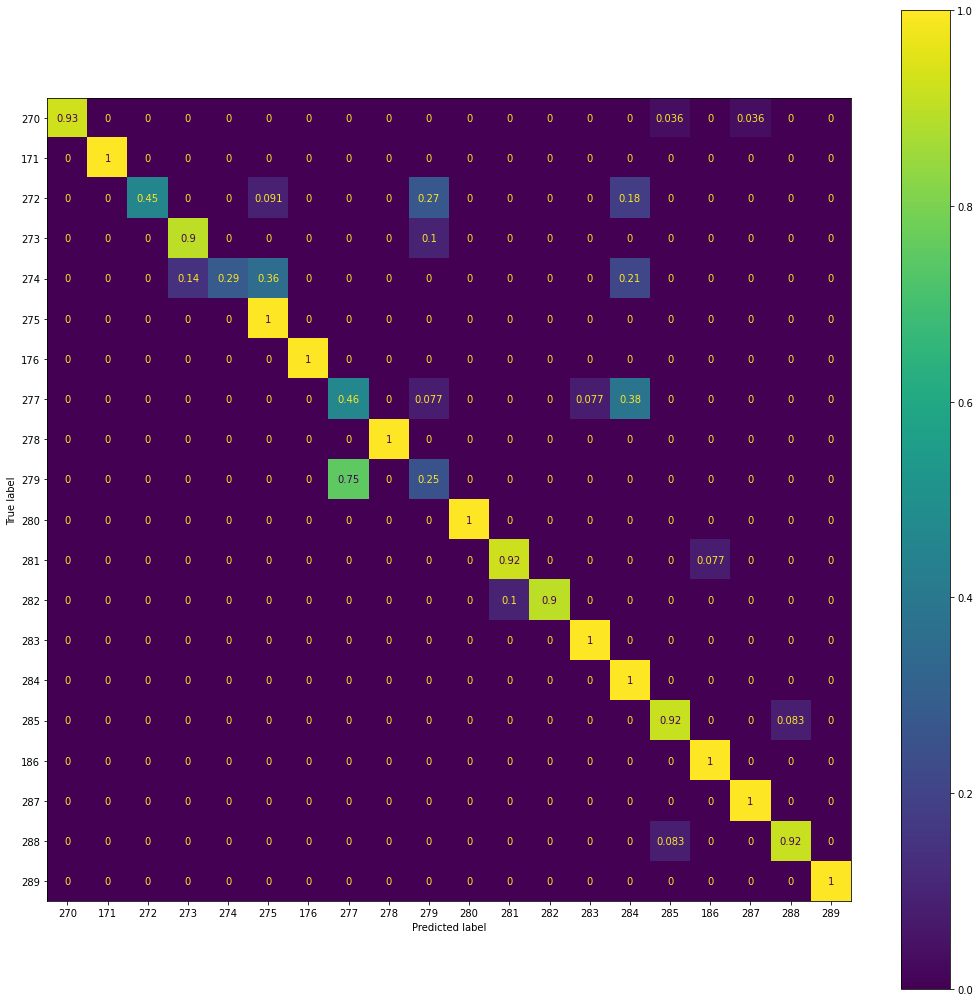

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      # Election day the network need to have the sample and the gold label
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      # Speaker identification network need to have the sample and the place
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
    plt.show()


In [ ]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_mean_accuracies), 3))

maximum of min 0.55
maximum of topk 0.571
maximum of mean 0.572
maximum of final mean 0.891
maximum of final min 0.891


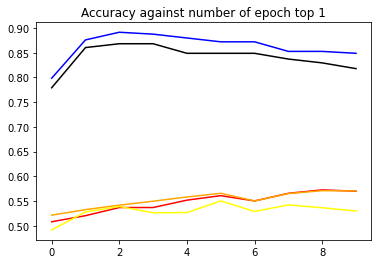

In [ ]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')